In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


In [119]:
df = pd.read_csv('../../data/trimmed_data1025.csv', index_col='id')
df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,...,False,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe
8776,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
34310,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,...,True,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe
67743,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,True,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe
19728,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


In [120]:
df['status_group'].value_counts()

functional                 32237
non functional             22813
functional needs repair     4314
Name: status_group, dtype: int64

In [121]:
df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,...,False,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe
8776,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
34310,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,...,True,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe
67743,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,True,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe
19728,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


In [122]:
df.isna().sum()

status_group                0
amount_tsh                  0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
lga                         0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment                     0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type_group       0
dtype: int64

In [123]:

df['binary_status'] = df['status_group'] != 'non functional'

df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group,binary_status
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,...,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,True
8776,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,...,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,True
34310,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,...,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe,True
67743,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe,False
19728,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,...,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,True


In [124]:
y = df['binary_status']
X = df.drop(['status_group', 'binary_status'], axis=1)
X.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,population,...,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,...,False,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,280,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,...,True,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe
67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,...,True,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe
19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,0,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


In [125]:
num_cols = []
ohe_cols = []
freq_cols = []

for c in df.columns:
    if df[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif df[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)
        
print(num_cols, ohe_cols, freq_cols)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year'] ['status_group', 'basin', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group', 'binary_status'] ['funder', 'installer', 'region', 'lga', 'scheme_management', 'source']


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 396)

In [127]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((44523, 21), (44523,), (14841, 21), (14841,))

### Pre-modeling transformations

**NUMERIC COLUMNS**

-Create new t/f columns for construction year and population
- MinMaxScaler - assumes normal distribution
- IterativeImputer
    - population
    - construction year
    - lat/long - 0's only incorrect in longitude 

**CATEGORICAL COLUMNS**
- Fill in blanks w/ sklearn.impute.IterativeImputer¶



In [130]:
# transform incorrect long/lat to nulls 
X_train.loc[(X_train['longitude']== 0), ('longitude','latitude')] = np.nan


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [134]:
X_test.loc[(X_test['longitude']== 0), ('longitude','latitude')] = np.nan

C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14841 entries, 51649 to 15879
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14841 non-null  float64
 1   funder                 13961 non-null  object 
 2   gps_height             14841 non-null  int64  
 3   installer              13957 non-null  object 
 4   longitude              14410 non-null  float64
 5   latitude               14410 non-null  float64
 6   basin                  14841 non-null  object 
 7   region                 14841 non-null  object 
 8   lga                    14841 non-null  object 
 9   population             14841 non-null  int64  
 10  scheme_management      13857 non-null  object 
 11  permit                 14098 non-null  object 
 12  construction_year      14841 non-null  int64  
 13  extraction_type_class  14841 non-null  object 
 14  management_group       14841 non-null  object 
 15

(1900.0, 2050.0)

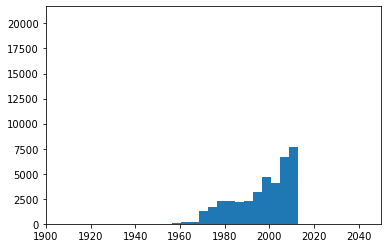

In [87]:
fig, ax = plt.subplots()

ax.hist(df['construction_year'], bins=500)

ax.set_xlim(1900, 2050)


(0.0, 5000.0)

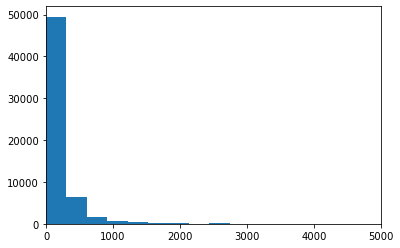

In [89]:
fig, ax = plt.subplots()

ax.hist(df['population'], bins=100)

ax.set_xlim(0, 5000)


### Post-Split Transformations

In [94]:
it_impute = IterativeImputer(random_state=396)

X_train_itimp = it_impute.fit_transform(X_train)

ValueError: could not convert string to float: 'Government Of Tanzania'

In [ ]:




num_col_transform = Pipeline( steps =[
    ('scaler', MinMaxScaler())
    ])

sml_cat_col_transform = Pipeline(steps =[
    ('ohe', OneHotEncoder())
])